<a href="https://colab.research.google.com/github/shreyhaw/EDU-/blob/main/Pandemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Inspect the data
print(df.info())
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB
None
         Date      Country  Confirmed  Recovered  Deaths
0  2020-01-22  Afghanistan          0          0       0
1  2020-01-23  Afghanistan          0          0       0
2  2020-01-24  Afghanistan          0          0       0
3  2020-01-25  Afghanistan          0          0       0
4  2020-01-26  Afghanistan          0          0       0
Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column    

In [2]:
# Display basic information about the dataset
print(df.describe())
print(df.sample(5))

# Handle any outliers or inconsistencies (if any)
# For simplicity, let's assume there are no outliers to handle in this step


                                Date     Confirmed     Recovered  \
count                         161568  1.615680e+05  1.615680e+05   
mean   2021-03-04 11:59:59.999999232  7.361569e+05  1.453967e+05   
min              2020-01-22 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-08-12 18:00:00  1.220000e+03  0.000000e+00   
50%              2021-03-04 12:00:00  2.369200e+04  1.260000e+02   
75%              2021-09-24 06:00:00  2.558420e+05  1.797225e+04   
max              2022-04-16 00:00:00  8.062512e+07  3.097475e+07   
std                              NaN  3.578884e+06  9.748275e+05   

              Deaths  
count  161568.000000  
mean    13999.436089  
min         0.000000  
25%        17.000000  
50%       365.000000  
75%      4509.000000  
max    988609.000000  
std     59113.581271  
             Date    Country  Confirmed  Recovered  Deaths
43620  2021-01-28    Ecuador     246000     204071   14766
84954  2020-04-21  Lithuania       1226        179      26
270

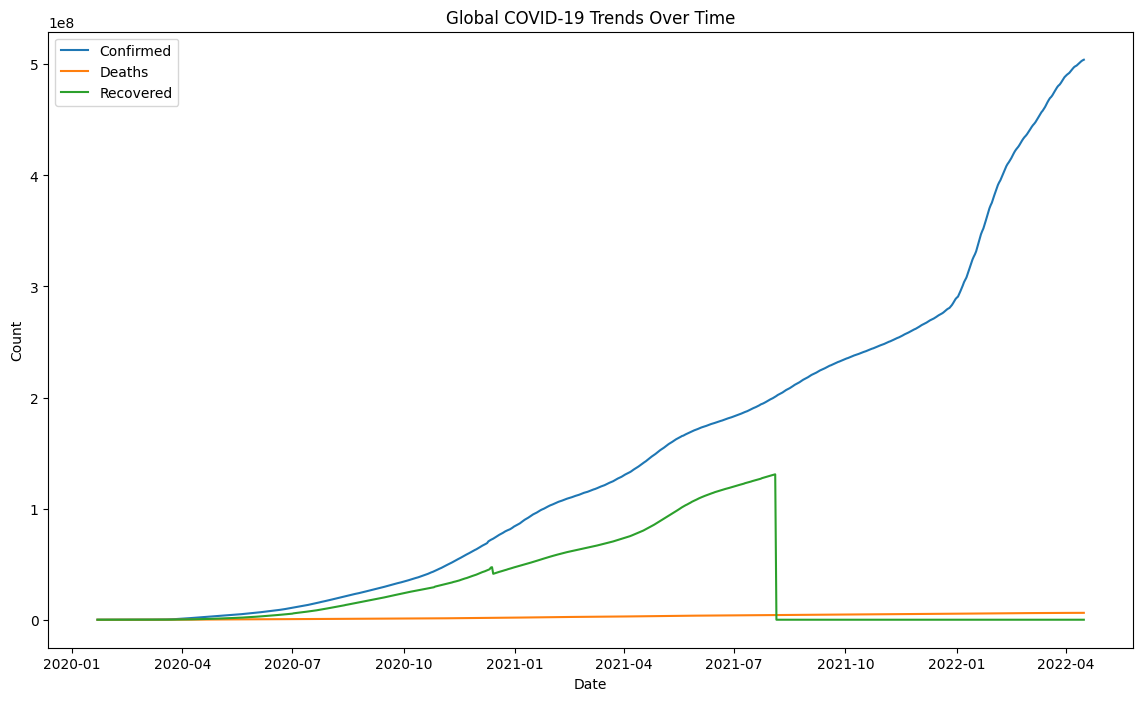

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting total number of confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df.groupby('Date').sum().reset_index(), x='Date', y='Confirmed', label='Confirmed')
sns.lineplot(data=df.groupby('Date').sum().reset_index(), x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=df.groupby('Date').sum().reset_index(), x='Date', y='Recovered', label='Recovered')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends Over Time')
plt.legend()
plt.show()


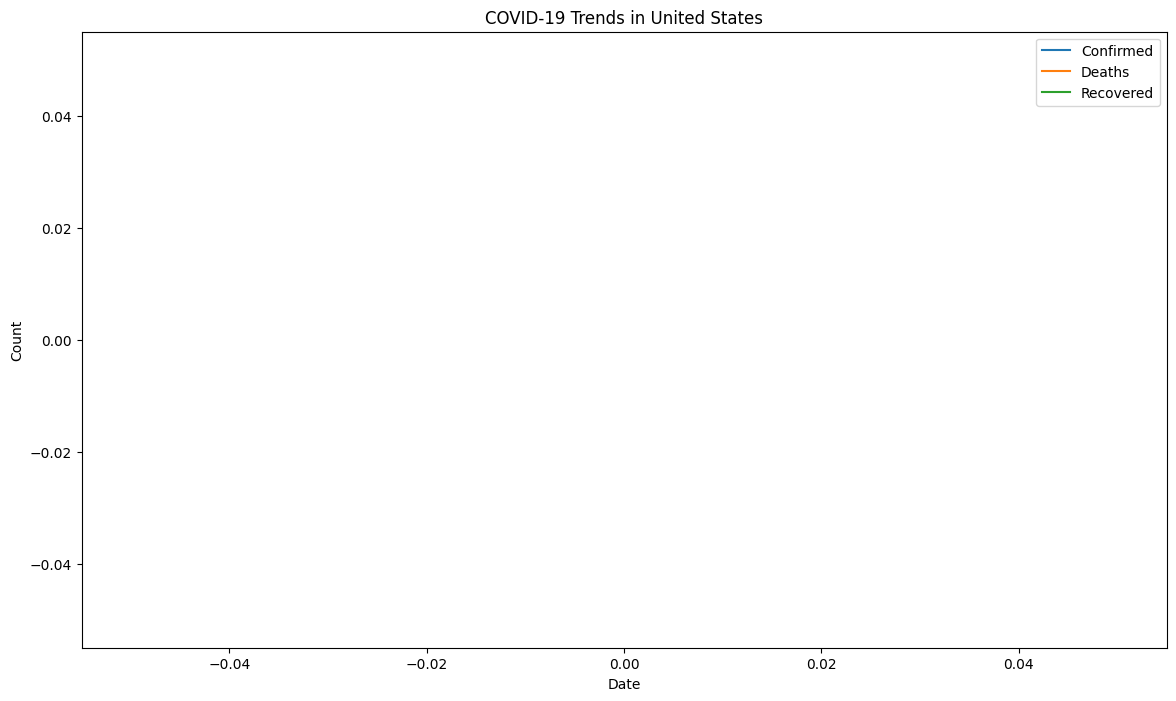

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

def plot_country_trends(country):
    country_data = df[df['Country'] == country]
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label='Confirmed')
    sns.lineplot(data=country_data, x='Date', y='Deaths', label='Deaths')
    if 'Recovered' in country_data.columns:
        sns.lineplot(data=country_data, x='Date', y='Recovered', label='Recovered')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'COVID-19 Trends in {country}')
    plt.legend()
    plt.show()

# Example usage
plot_country_trends('United States')


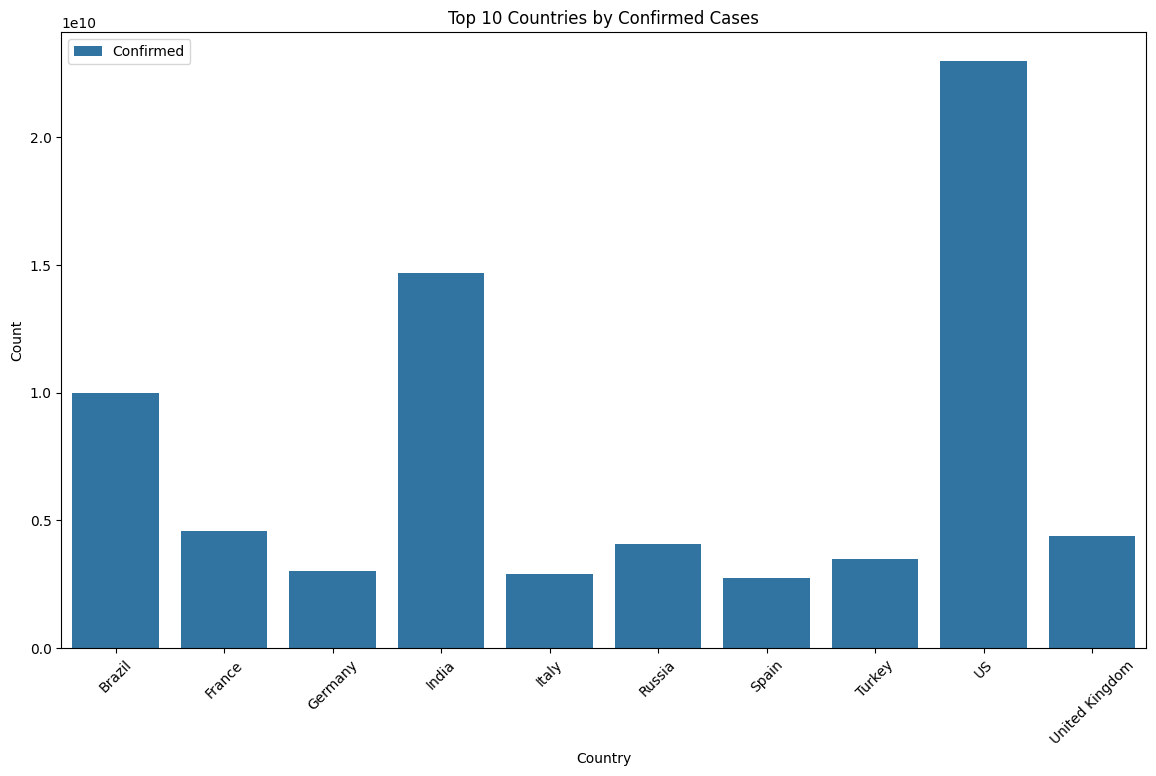

In [6]:
# Get the top 10 most affected countries, excluding the 'Date' column from the sum
top_10_countries = df.groupby('Country').sum(numeric_only=True).sort_values(by='Confirmed', ascending=False).head(10).index

# Plotting total number of confirmed cases, deaths, and recoveries for top 10 countries
plt.figure(figsize=(14, 8))
sns.barplot(x=df[df['Country'].isin(top_10_countries)].groupby('Country').sum(numeric_only=True).reset_index()['Country'],
            y=df[df['Country'].isin(top_10_countries)].groupby('Country').sum(numeric_only=True).reset_index()['Confirmed'],
            label='Confirmed')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


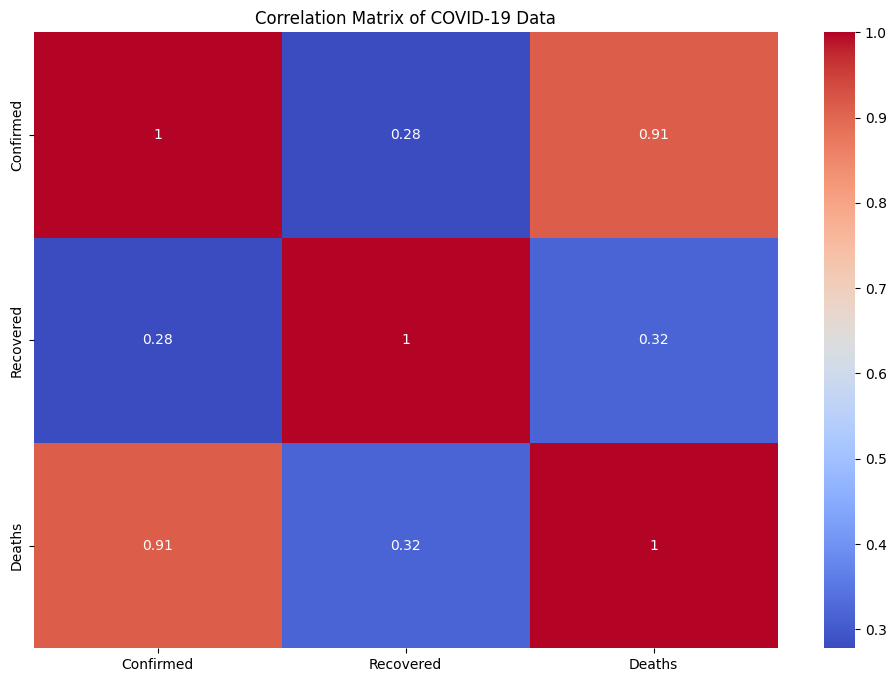

In [8]:
# Calculate correlation matrix for numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()
